In [46]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import os
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from Helper.shue_model import shue_magnetopause_surface, shue_magnetopause_xz, shue_magnetopause_xy, shue_magnetopause_yz
import pyspedas
from pyspedas import get_data
from Helper.shue_model import filter_train_samples_by_time, shue_radius_at_x
from Helper.plotting import plot_variables_from_sections
from Helper.moon import lunar_wake_check_series
from Helper.silence import retry_request

from data_loader import MagnetotailDataset
from double_transformer_multi import DoubleTransformerMulti

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No CUDA")

2.2.1
12.1
True
NVIDIA GeForce RTX 4060 Laptop GPU


In [48]:
# PREDICT DATASET 1
file_path = Path('..') / "Data" / "generation_data" / "artemis_P1_full.h5"
abs_file_path_B = file_path.resolve()

# Create dataset
generation_dataset_B = MagnetotailDataset(abs_file_path_B)

generation_samples_B = generation_dataset_B.get_trainable_samples()

Setting trainable samples for each section...


100%|██████████| 159/159 [00:00<00:00, 189.13it/s]


Computing plasma beta for each section...


100%|██████████| 159/159 [00:14<00:00, 11.27it/s]


Extracting magnetic field x-component for each section...


100%|██████████| 159/159 [00:00<?, ?it/s]


Computing magnetic field magnitude for each section...


100%|██████████| 159/159 [00:00<00:00, 15452.03it/s]


Computing ion velocity magnitude for each section...


100%|██████████| 159/159 [00:00<00:00, 32856.79it/s]


Extracting ion velocity x-component for each section...


100%|██████████| 159/159 [00:00<00:00, 158860.01it/s]


02-Oct-25 20:48:25: c:\Users\ianma\miniconda3\envs\deep_learning\Lib\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(



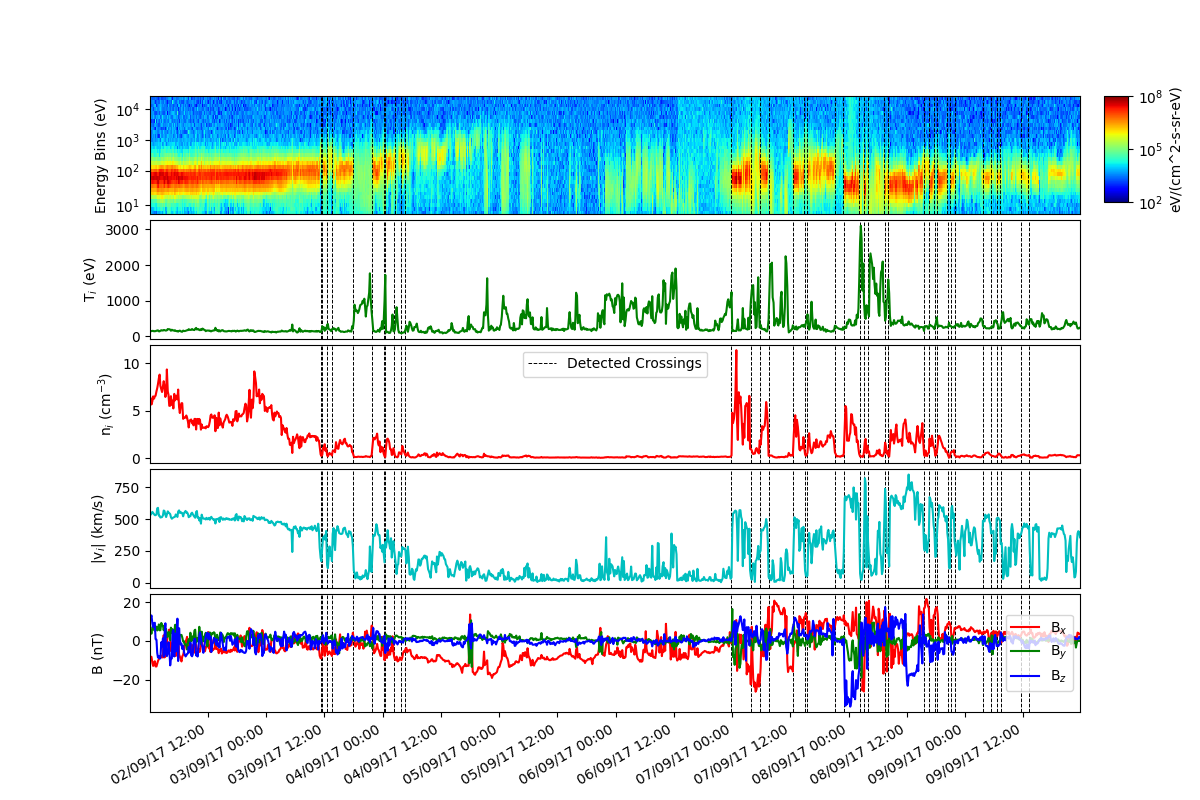

{'times': array(['2017-09-02T00:02:57.437081600', '2017-09-02T00:12:07.192895488',
        '2017-09-02T00:21:16.948709376', ...,
        '2017-09-09T23:21:24.032929792', '2017-09-09T23:32:51.227697152',
        '2017-09-09T23:42:00.983511040'], dtype='datetime64[ns]'),
 'times_original_type': 'Tensor',
 'ion_eflux_original_type': 'Tensor',
 'ion_eflux': array([[ 8009.7583 ,  9969.298  , 17374.08   , ...,  4213.1753 ,
          4056.3284 ,   748.94507],
        [ 2736.5361 ,  6246.587  ,  7450.6333 , ...,  1996.8024 ,
          6492.244  ,  2065.0505 ],
        [ 7976.606  ,  6579.8027 , 16898.625  , ...,  1848.1478 ,
          3214.9375 ,  2660.2222 ],
        ...,
        [ 6117.4023 , 14007.76   ,  7048.7617 , ...,  2403.1665 ,
          2491.322  ,   931.9    ],
        [ 5793.448  ,  8263.352  ,  4797.054  , ...,   539.1037 ,
          2391.5198 ,  4267.48   ],
        [ 4927.558  ,  6831.781  ,  7015.9004 , ...,  2340.4692 ,
          1381.0339 ,  8699.396  ]], dtype=float32),
 'i

In [92]:
%matplotlib widget
plot_variables_from_sections(section=generation_samples_C['section_059'], variables=['ion_eflux', 'ion_avgtemp', 'ion_density', 'ion_velocity_magnitude','magnetic_field_gsm'], crossing_times=predicted_crossing_times_norm_C, logscale=False, figsize=(12, 8))

02-Oct-25 20:13:33: c:\Users\ianma\miniconda3\envs\deep_learning\Lib\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(



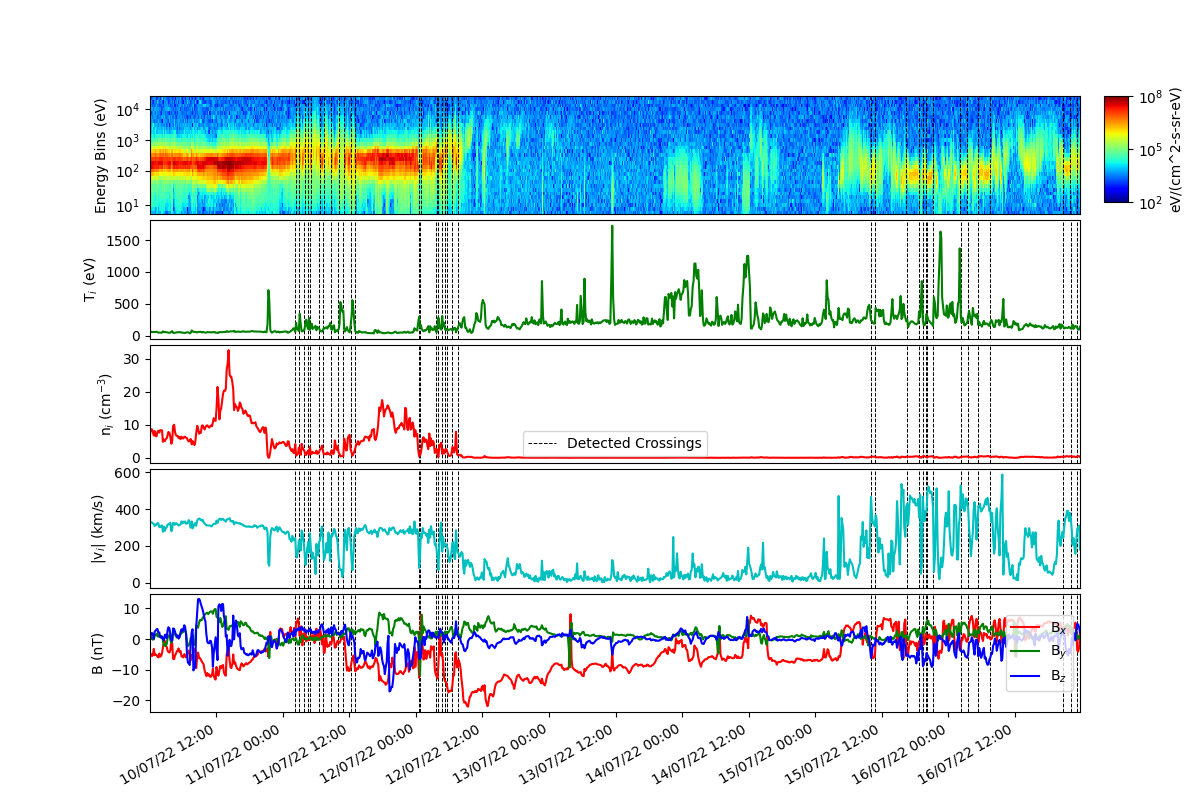

{'times': array(['2022-07-10T00:03:06.851983360', '2022-07-10T00:14:34.046750720',
        '2022-07-10T00:23:43.802564608', ...,
        '2022-07-16T23:23:01.785051136', '2022-07-16T23:34:28.979818496',
        '2022-07-16T23:43:38.735632384'], dtype='datetime64[ns]'),
 'times_original_type': 'Tensor',
 'ion_eflux_original_type': 'Tensor',
 'ion_eflux': array([[ 5443.3013, 13654.188 , 35125.94  , ...,  1508.545 ,  4978.654 ,
          1573.3622],
        [ 6939.6016, 13327.635 , 29787.133 , ...,  4104.3564,  4803.0806,
          1567.6522],
        [ 6823.796 , 13147.065 , 33209.562 , ...,  1884.563 ,  1632.3728,
          2690.942 ],
        ...,
        [ 1763.7676,  5875.8945,   928.3816, ...,  2940.4128,  1675.1693,
          2609.2751],
        [ 3466.379 ,  3902.1191,  5252.5474, ...,  1945.7765,  3381.328 ,
          2369.9055],
        [ 3717.172 ,  4499.4307, 12320.277 , ...,  3178.7349,  5584.6133,
          1923.4606]], dtype=float32),
 'ion_avgtemp_original_type': 'Tensor',

In [75]:
plot_variables_from_sections(section=generation_samples_C['section_129'], variables=['ion_eflux', 'ion_avgtemp', 'ion_density', 'ion_velocity_magnitude', 'magnetic_field_gsm'], hour_interval=12, crossing_times=predicted_crossing_times_norm_C, logscale=False, figsize=(12, 8))

In [51]:
generation_samples_B['section_000'].keys()

dict_keys(['electron_avgtemp', 'electron_density', 'electron_eflux', 'electron_velocity_gsm', 'electron_vthermal', 'ion_avgtemp', 'ion_density', 'ion_eflux', 'ion_velocity_gsm', 'ion_vthermal', 'magnetic_field_gsm', 'times', 'session_id', 'region', 'plasma_beta', 'log_plasma_beta', 'magnetic_field_gsm_x', 'magnetic_field_gsm_magnitude', 'ion_velocity_magnitude', 'ion_velocity_gsm_x'])

In [44]:
# PREDICT DATASET 1
file_path = Path('..') / "Data" / "generation_data" / "artemis_P2_full.h5"
abs_file_path_C = file_path.resolve()

# Create dataset
generation_dataset_C = MagnetotailDataset(abs_file_path_C)

generation_samples_C = generation_dataset_C.get_trainable_samples()

Setting trainable samples for each section...


100%|██████████| 159/159 [00:01<00:00, 138.82it/s]


Computing plasma beta for each section...


100%|██████████| 159/159 [00:13<00:00, 11.45it/s]


Extracting magnetic field x-component for each section...


100%|██████████| 159/159 [00:00<?, ?it/s]


Computing magnetic field magnitude for each section...


100%|██████████| 159/159 [00:00<00:00, 65317.76it/s]


Computing ion velocity magnitude for each section...


100%|██████████| 159/159 [00:00<00:00, 36222.60it/s]


Extracting ion velocity x-component for each section...


100%|██████████| 159/159 [00:00<?, ?it/s]


In [45]:
# TEST DATASET
file_path = Path('..') / "Data" / "testing_data" / "artemis_P1_v4.h5"
abs_file_path = file_path.resolve()

# Create dataset
test_dataset = MagnetotailDataset(abs_file_path)


Setting trainable samples for each section...


100%|██████████| 32/32 [00:00<00:00, 334.25it/s]


Computing plasma beta for each section...


100%|██████████| 32/32 [00:02<00:00, 13.91it/s]


Extracting magnetic field x-component for each section...


100%|██████████| 32/32 [00:00<00:00, 14410.32it/s]


Computing magnetic field magnitude for each section...


100%|██████████| 32/32 [00:00<00:00, 10535.97it/s]


Computing ion velocity magnitude for each section...


100%|██████████| 32/32 [00:00<?, ?it/s]


Extracting ion velocity x-component for each section...


100%|██████████| 32/32 [00:00<?, ?it/s]


In [52]:
# Get the trainable samples from the dataset
validation_samples = test_dataset.get_trainable_samples()
boundary_time = np.datetime64('2012-08-29T00:00:00.000000000', 'ns')

# Apply the function
validation_samples = filter_train_samples_by_time(validation_samples, test_dataset, boundary_time, method='more_than')

In [53]:
import pandas as pd

file_path = Path('..') / "Data" / "ART_Xing_times_pos.xlsx"
abs_file_path = file_path.resolve()
# Read the Excel file and extract the first sheet with last 4 columns
df = pd.read_excel(abs_file_path, sheet_name=0)
df = df.iloc[:, -7:-1]  # Keep only the last 4 columns (last one is bugged so it is written with -5 to -1)

crossing_times_ns = pd.to_datetime(df['coupled time']).values.astype('datetime64[ns]')

02-Oct-25 18:03:04: c:\Users\ianma\miniconda3\envs\deep_learning\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()



In [54]:
# TRAINING DATASET
file_path = Path('..') / "Data" / "training_data" / "artemis_P1_v4.h5"
abs_file_path = file_path.resolve()

# Create dataset
dataset = MagnetotailDataset(abs_file_path)

Setting trainable samples for each section...


100%|██████████| 162/162 [00:00<00:00, 534.73it/s]


Computing plasma beta for each section...


100%|██████████| 162/162 [00:03<00:00, 43.87it/s]


Extracting magnetic field x-component for each section...


100%|██████████| 162/162 [00:00<00:00, 80803.57it/s]


Computing magnetic field magnitude for each section...


100%|██████████| 162/162 [00:00<00:00, 27887.43it/s]


Computing ion velocity magnitude for each section...


100%|██████████| 162/162 [00:00<00:00, 80986.56it/s]


Extracting ion velocity x-component for each section...


100%|██████████| 162/162 [00:00<00:00, 78670.52it/s]


In [55]:
%matplotlib inline
dataset.set_regions_for_sections(overwrite=False)

In [144]:
data_types = ['ion_eflux', 'ion_avgtemp', 'ion_density', 'ion_velocity_magnitude']

# Create and load model (standard model parameters for all provided models)
model = DoubleTransformerMulti(
    input_dim                   = 31,
    timestamps                  = 1, # Adapt to model used
    d_model                     = 64,
    nhead                       = 2,
    num_encoder_layers          = 2,
    num_decoder_layers          = 2,
    dim_feedforward             = 64,
    mask_ratio                  = 0.4,
    patches_per_timestamp_spect = 8,
    n_vectors                   = 0,
    n_scalars                   = 3,
    data_types                  = data_types,
    device                      = 'cuda' if torch.cuda.is_available() else 'cpu',
    window_average_data         = 3,
    mask_scalars                = False
)

model.load_models('models/1_steps_velocity/tail_avg4_non_strict.pth', 'models/1_steps_velocity/sheath_avg4_non_strict.pth')


Padding input_dim from 31 to 32 to make it divisible by 8
Created 70 deterministic noise patterns for single timestamp
Padding input_dim from 31 to 32 to make it divisible by 8


In [145]:
results = model.get_results(validation_samples, crossing_times=crossing_times_ns, window_average_errors=2)

In [146]:
### EXTRACT TRUE CROSSING POSITIONS FROM CDAWEB ###

# Get true crossing times
true_crossings = np.array(results['true_crossings'])
true_crossings_str = np.array([str(t) for t in true_crossings])
cdaweb_obj = pyspedas.CDAWeb()

# Define start and end times for data retrieval
start_time = true_crossings_str[0]
end_time = true_crossings_str[-1]
dataset = 'THB_OR_SSC (2007-02-24 to 2025-08-31)'

# Get the list of files for the specified time range
urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/")

true_data = get_data('XYZ_GSE')
true_data_times = true_data.times
true_data_pos = true_data.y

# Convert datetime64 arrays to numeric values for interpolation
data_times_numeric = (true_data_times * 1e9).astype('datetime64[ns]').astype(np.int64)
true_crossings_numeric = true_crossings.astype('datetime64[ns]').astype(np.int64)

# Interpolate positions for predicted crossing times
true_positions = np.zeros((len(true_crossings), true_data_pos.shape[1]))

for i in range(true_data_pos.shape[1]):
    true_positions[:, i] = np.interp(true_crossings_numeric, data_times_numeric, true_data_pos[:, i])

### EXTRACT PREDICTED CROSSING POSITIONS FROM CDAWEB ###

# Get predicted crossing times
predicted_crossing_times_norm =  np.array(results['zero_crossing_times_normalized'])

# Convert datetime64 arrays to numeric values for interpolation
data_times_numeric = (true_data_times * 1e9).astype('datetime64[ns]').astype(np.int64)
predicted_times_numeric = predicted_crossing_times_norm.astype('datetime64[ns]').astype(np.int64)

# Interpolate positions for predicted crossing times
predicted_positions = np.zeros((len(predicted_crossing_times_norm), true_data_pos.shape[1]))

for i in range(true_data_pos.shape[1]):
    predicted_positions[:, i] = np.interp(predicted_times_numeric, data_times_numeric, true_data_pos[:, i])

### REMOVE CROSSINGS IN LUNAR WAKE ###

times_crossing = [str(time.astype('datetime64[s]')) for time in predicted_crossing_times_norm]
crossings_in_wake = lunar_wake_check_series(predicted_positions, times_crossing)
results['zero_crossing_times_normalized'] = [time for i, time in enumerate(results['zero_crossing_times_normalized']) if not crossings_in_wake[i]]


02-Oct-25 21:24:41: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2012\thb_or_ssc_20120901_v01.cdf
02-Oct-25 21:24:41: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2012\thb_or_ssc_20121001_v01.cdf
02-Oct-25 21:24:42: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2012\thb_or_ssc_20121101_v01.cdf
02-Oct-25 21:24:42: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2012\thb_or_ssc_20121201_v01.cdf
02-Oct-25 21:24:43: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2013\thb_or_ssc_20130101_v01.cdf
02-Oct-25 21:24:43: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2013\thb_or_ssc_20130201_v01.cdf
02-Oct-25 21:24:44: File is curren

In [147]:
score = model.get_model_score(results, time_window_minutes=30, method='hungarian')
score['dataframe'][['Metric', 'Normalized']].round(4)

,Metric,Normalized
0,True Positive Rate,0.376
1,False Positive Rate,0.141
2,False Negative Rate,0.624
3,True Positives,85
4,In Range Positives,114
5,Out Range Predicted Positives,14
6,False Positives,14
7,False Negatives,141
8,Precision,0.859
9,F1 Score,0.523


28-Sep-25 15:11:43: c:\Users\ianma\miniconda3\envs\deep_learning\Lib\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(

28-Sep-25 15:11:43: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:20: RuntimeWarning: divide by zero encountered in divide
  R = r0 * (2.0 / (1.0 + np.cos(TH)))**alpha

28-Sep-25 15:11:43: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:23: RuntimeWarning: invalid value encountered in multiply
  Z = R * np.sin(TH) * np.sin(PH)



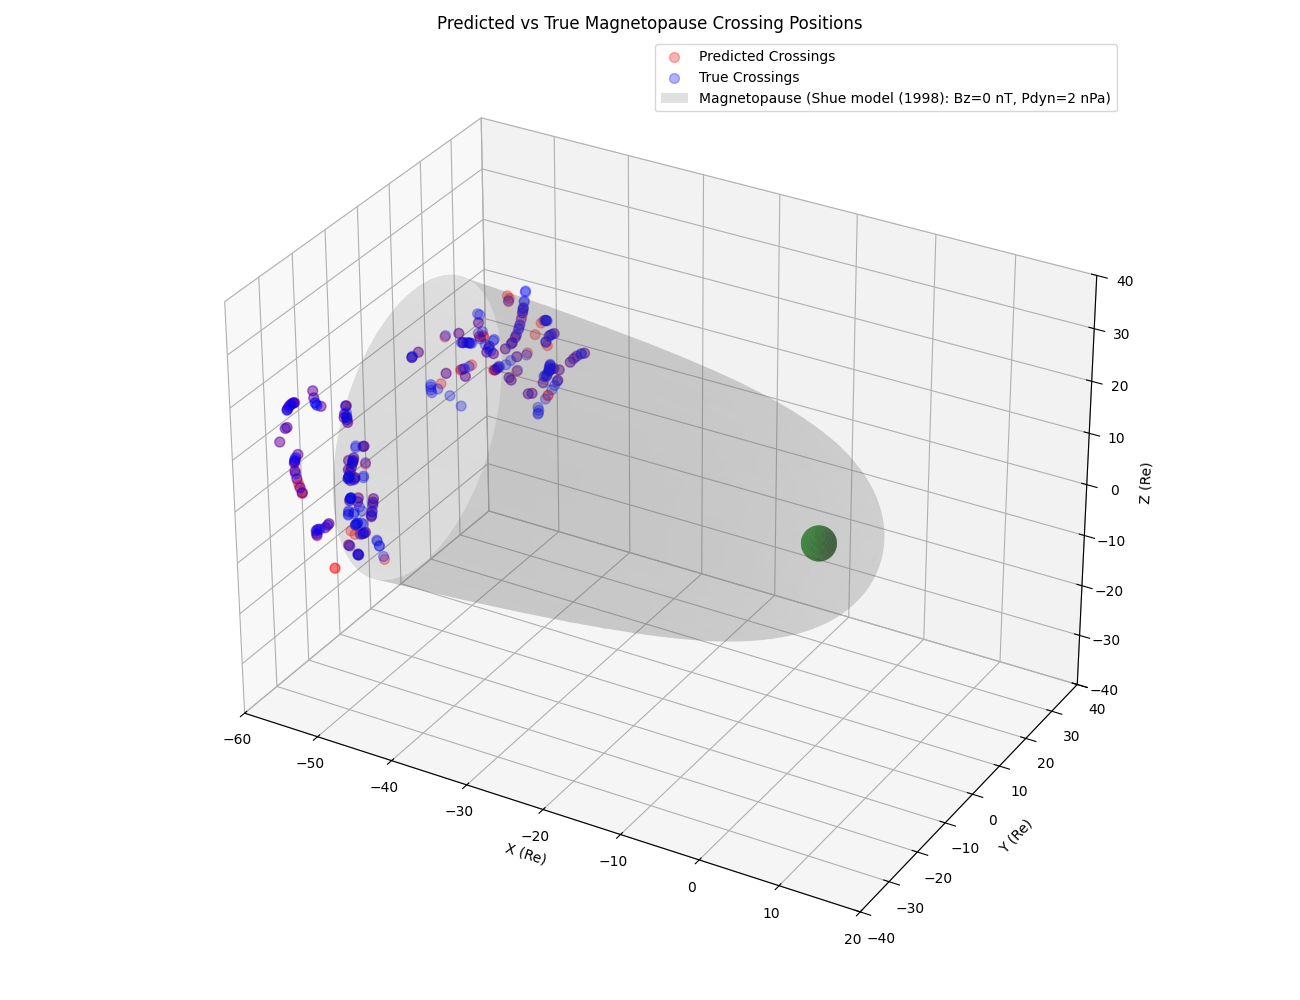

In [ ]:
%matplotlib widget
plt.close()
import matplotlib.lines as mlines
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')

# Create Earth sphere with radius of 1 Re
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)

# Plot predicted positions
ax.scatter(predicted_positions[:, 0], predicted_positions[:, 1], predicted_positions[:, 2], 
           c='red', s=50, alpha=0.3, label='Predicted Crossings')

# Plot true positions
ax.scatter(true_positions[:, 0], true_positions[:, 1], true_positions[:, 2], 
           c='blue', s=50, alpha=0.3, label='True Crossings')


# Plot spacecraft trajectory
# ax.plot(true_data_pos[:, 0], true_data_pos[:, 1], true_data_pos[:, 2], 
#         c='black', alpha=0.1, label='Spacecraft Trajectory')

# Set labels
ax.set_xlabel('X (Re)')
ax.set_ylabel('Y (Re)')
ax.set_zlabel('Z (Re)')

# Set equal aspect ratio for all axes
box_aspect = [3/2,1,1]  # Different aspect ratio
ax.set_box_aspect(box_aspect)

# Set axis limits based on data range
xlim = [-60, 20]
ylim = [-40, 40]
zlim = [-40, 40]
ax.set_xlim([-60, 20])
ax.set_ylim([-40, 40])
ax.set_zlim([-40, 40])

# Build the magnetopause surface (using your axis limits)
mp_x, mp_y, mp_z = shue_magnetopause_surface(Bz_nT=0.0, Pdyn_nPa=2.0,
                                             Xmin=-80, Xmax=xlim[1])

# Apply the same visual x-stretch you used for the Earth sphere
x_stretch = (box_aspect[1] / box_aspect[0]) * ((xlim[1] - xlim[0]) / (ylim[1] - ylim[0]))
mp_x_plot = mp_x * x_stretch

# Draw the surface
ax.plot_surface(mp_x_plot, mp_y, mp_z, alpha=0.15, linewidth=0, color='gray', label='Magnetopause (Shue model (1998): Bz=0 nT, Pdyn=2 nPa)')

# Add a legend entry for the surface (plot_surface doesn't auto-legend)
mp_proxy = mlines.Line2D([], [], color='gray', lw=6, alpha=0.6,
                         label='Magnetopause (Shue model: Bz=0 nT, Pdyn=2 nPa)')
handles, labels = ax.get_legend_handles_labels()
handles.append(mp_proxy)
labels.append(mp_proxy.get_label())
ax.legend(handles, labels)

stretch = box_aspect[1]/ box_aspect[0]  # Stretch factor for x-axis

# Earth radius in Re (Earth radii) - 1 Re
earth_radius = 3.0
earth_x = earth_radius * np.outer(np.cos(u), np.sin(v))*stretch*(np.diff(xlim)/np.diff(ylim))
earth_y = earth_radius * np.outer(np.sin(u), np.sin(v))
earth_z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot Earth as a blue sphere
ax.plot_surface(earth_x, earth_y, earth_z, color='green', alpha=0.6)
ax.legend()
ax.set_title('Predicted vs True Magnetopause Crossing Positions')
plt.tight_layout()
plt.show()

28-Sep-25 09:20:24: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:90: RuntimeWarning: divide by zero encountered in divide
  R = r0 * (2.0 / (1.0 + np.cos(theta)))**alpha



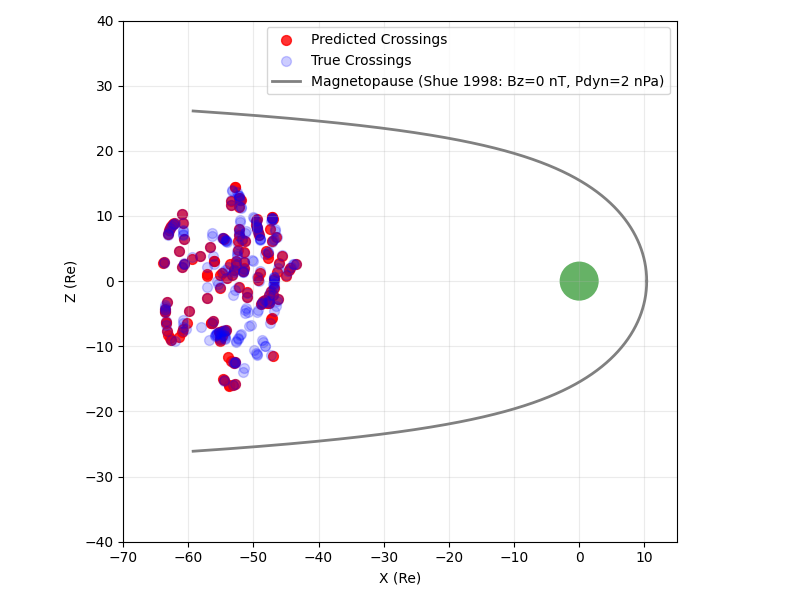

In [ ]:
from matplotlib.patches import Circle

# --- Figure ---
fig, ax = plt.subplots(figsize=(8,6))

# Axis limits (match your 3D view)
xlim = [-70, 15]
zlim = [-40, 40]

# (Optional) If you prefer only points near the X–Z plane, filter by |Y|<=delta.
# delta = 2.0
# pred_mask = np.abs(predicted_positions[:, 1]) <= delta
# true_mask = np.abs(true_positions[:, 1]) <= delta
# xp, zp = predicted_positions[pred_mask, 0], predicted_positions[pred_mask, 2]
# xt, zt = true_positions[true_mask, 0], true_positions[true_mask, 2]
# Otherwise, just project by dropping Y:
xp, zp = predicted_positions[:, 0], predicted_positions[:, 2]
xt, zt = true_positions[:, 0], true_positions[:, 2]

# Points (X vs Z)
ax.scatter(xp, zp, c='red', s=50, alpha=0.8, label='Predicted Crossings')
ax.scatter(xt, zt, c='blue', s=50, alpha=0.2, label='True Crossings')

# Magnetopause curve (upper and lower halves)
mp_x, mp_z = shue_magnetopause_xz(Bz_nT=0.0, Pdyn_nPa=2.0)
mask = (mp_x >= -60) & (mp_x <= xlim[1])  # match your 3D windowing
ax.plot(mp_x[mask],  mp_z[mask],  lw=2, color='gray',
        label='Magnetopause (Shue 1998: Bz=0 nT, Pdyn=2 nPa)')
ax.plot(mp_x[mask], -mp_z[mask], lw=2, color='gray')

# Earth as a filled circle at the origin
earth_radius = 3.0  # set to 1.0 if you want unit Earth
earth = Circle((0.0, 0.0), radius=earth_radius, facecolor='green',
               alpha=0.6, edgecolor='none')
ax.add_patch(earth)

# Cosmetics
ax.set_xlim(xlim)
ax.set_ylim(zlim)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X (Re)')
ax.set_ylabel('Z (Re)')
ax.grid(True, alpha=0.25)
ax.legend()
plt.tight_layout()
plt.show()

28-Sep-25 09:20:25: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:108: RuntimeWarning: divide by zero encountered in divide
  R = r0 * (2.0 / (1.0 + np.cos(theta)))**alpha



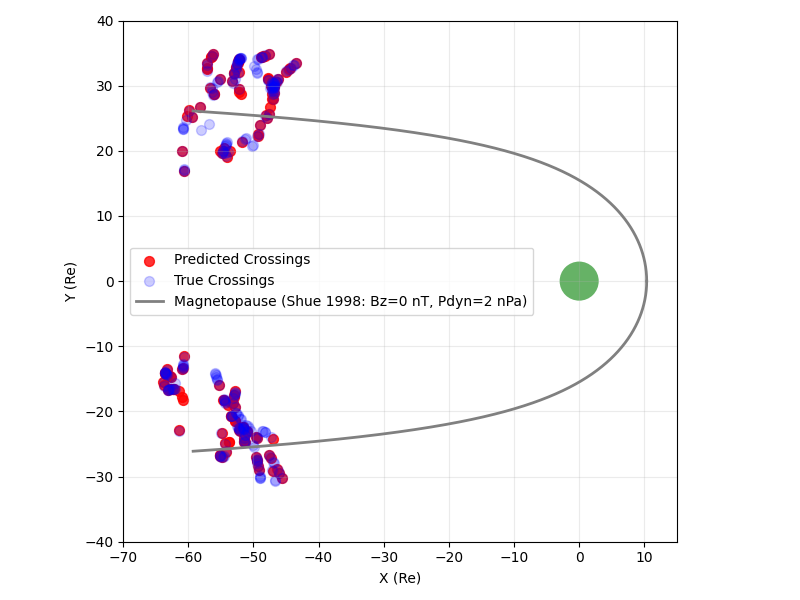

In [ ]:
from matplotlib.patches import Circle

# --- Figure ---
fig, ax = plt.subplots(figsize=(8,6))

# Axis limits (match your 3D view)
xlim = [-70, 15]
ylim = [-40, 40]

# (Optional) If you prefer only points near the X–Z plane, filter by |Y|<=delta.
# delta = 2.0
# pred_mask = np.abs(predicted_positions[:, 1]) <= delta
# true_mask = np.abs(true_positions[:, 1]) <= delta
# xp, zp = predicted_positions[pred_mask, 0], predicted_positions[pred_mask, 2]
# xt, zt = true_positions[true_mask, 0], true_positions[true_mask, 2]
# Otherwise, just project by dropping Y:
xp, yp = predicted_positions[:, 0], predicted_positions[:, 1]
xt, yt = true_positions[:, 0], true_positions[:, 1]

# Points (X vs Z)
ax.scatter(xp, yp, c='red', s=50, alpha=0.8, label='Predicted Crossings')
ax.scatter(xt, yt, c='blue', s=50, alpha=0.2, label='True Crossings')

# Magnetopause curve (upper and lower halves)
mp_x, mp_y = shue_magnetopause_xy(Bz_nT=0.0, Pdyn_nPa=2.0)
mask = (mp_x >= -60) & (mp_x <= xlim[1])  # match your 3D windowing
ax.plot(mp_x[mask],  mp_y[mask],  lw=2, color='gray',
        label='Magnetopause (Shue 1998: Bz=0 nT, Pdyn=2 nPa)')
ax.plot(mp_x[mask], -mp_y[mask], lw=2, color='gray')

# Earth as a filled circle at the origin
earth_radius = 3.0  # set to 1.0 if you want unit Earth
earth = Circle((0.0, 0.0), radius=earth_radius, facecolor='green',
               alpha=0.6, edgecolor='none')
ax.add_patch(earth)

# Cosmetics
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X (Re)')
ax.set_ylabel('Y (Re)')
ax.grid(True, alpha=0.25)
ax.legend()
plt.tight_layout()
plt.show()

In [149]:
generation_results_B = model.get_results(generation_samples_B, crossing_times=None, window_average_errors=2)
generation_results_C = model.get_results(generation_samples_C, crossing_times=None, window_average_errors=2)

In [151]:
# Get predicted crossing times
predicted_crossing_times_norm_B = np.sort(np.array(generation_results_B['zero_crossing_times_normalized']))
predicted_crossing_times_norm_C = np.sort(np.array(generation_results_C['zero_crossing_times_normalized']))

In [30]:
end_time =  str(predicted_crossing_times_norm_B[-1])
start_time =  str(predicted_crossing_times_norm_B[0])

print(f"Start time: {start_time}, End time: {end_time}")
dataset = 'THB_OR_SSC (2007-02-24 to 2025-08-31)'

# Get the list of files for the specified time range
urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/", varnames=['XYZ_GSE'])

true_data_B = get_data('XYZ_GSE')

true_data_times_B = true_data_B.times 
true_data_pos_B = true_data_B.y

Start time: 2013-08-17T16:10:43.024286692, End time: 2023-11-29T08:35:12.581327232


02-Oct-25 17:32:00: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2013\thb_or_ssc_20130801_v01.cdf
02-Oct-25 17:32:01: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2013\thb_or_ssc_20130901_v01.cdf
02-Oct-25 17:32:03: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2013\thb_or_ssc_20131001_v01.cdf
02-Oct-25 17:32:03: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2013\thb_or_ssc_20131101_v01.cdf
02-Oct-25 17:32:04: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2013\thb_or_ssc_20131201_v01.cdf
02-Oct-25 17:32:04: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thb\ssc\2014\thb_or_ssc_20140101_v01.cdf
02-Oct-25 17:32:05: File is curren

In [31]:
end_time =  str(predicted_crossing_times_norm_C[-1])
start_time =  str(predicted_crossing_times_norm_C[0])

print(f"Start time: {start_time}, End time: {end_time}")
dataset = 'THC_OR_SSC (2007-02-24 to 2025-08-31)'

# Get the list of files for the specified time range
urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist, "cdaweb/", varnames=['XYZ_GSE'])

true_data_C = get_data('XYZ_GSE')

true_data_times_C = true_data_C.times 
true_data_pos_C = true_data_C.y


Start time: 2013-08-18T07:38:30.279892092, End time: 2023-10-30T13:44:33.897306793


02-Oct-25 17:34:36: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thc\ssc\2013\thc_or_ssc_20130801_v01.cdf
02-Oct-25 17:34:36: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thc\ssc\2013\thc_or_ssc_20130901_v01.cdf
02-Oct-25 17:34:37: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thc\ssc\2013\thc_or_ssc_20131001_v01.cdf
02-Oct-25 17:34:38: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thc\ssc\2013\thc_or_ssc_20131101_v01.cdf
02-Oct-25 17:34:38: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thc\ssc\2013\thc_or_ssc_20131201_v01.cdf
02-Oct-25 17:34:39: File is current: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Training\cdaweb\themis\thc\ssc\2014\thc_or_ssc_20140101_v01.cdf
02-Oct-25 17:34:39: File is curren

In [152]:
### EXTRACT PREDICTED CROSSING POSITIONS FROM CDAWEB FOR GENERATION DATASET B ###

# Convert datetime64 arrays to numeric values for interpolation
data_times_numeric_B = (true_data_times_B * 1e9).astype('datetime64[ns]').astype(np.int64)
predicted_times_numeric_B = predicted_crossing_times_norm_B.astype('datetime64[ns]').astype(np.int64)

# Interpolate positions for predicted crossing times
predicted_positions_B = np.zeros((len(predicted_crossing_times_norm_B), true_data_pos_B.shape[1]))

for i in range(true_data_pos_B.shape[1]):
    predicted_positions_B[:, i] = np.interp(predicted_times_numeric_B, data_times_numeric_B, true_data_pos_B[:, i])

### REMOVE CROSSINGS IN LUNAR WAKE ###  
times_crossing_B = [str(time.astype('datetime64[s]')) for time in predicted_crossing_times_norm_B]
crossings_in_wake_B = lunar_wake_check_series(predicted_positions_B, times_crossing_B)

# Removal
predicted_crossing_times_norm_B = predicted_crossing_times_norm_B[~np.array(crossings_in_wake_B)]
predicted_positions_B = predicted_positions_B[~np.array(crossings_in_wake_B)]


In [153]:
### EXTRACT PREDICTED CROSSING POSITIONS FROM CDAWEB FOR GENERATION DATASET C ###

# Convert datetime64 arrays to numeric values for interpolation
data_times_numeric_C = (true_data_times_C * 1e9).astype('datetime64[ns]').astype(np.int64)
predicted_times_numeric_C = predicted_crossing_times_norm_C.astype('datetime64[ns]').astype(np.int64)

# Interpolate positions for predicted crossing times
predicted_positions_C = np.zeros((len(predicted_crossing_times_norm_C), true_data_pos_C.shape[1]))

for i in range(true_data_pos_C.shape[1]):
    predicted_positions_C[:, i] = np.interp(predicted_times_numeric_C, data_times_numeric_C, true_data_pos_C[:, i])

### REMOVE CROSSINGS IN LUNAR WAKE ###  
times_crossing_C = [str(time.astype('datetime64[s]')) for time in predicted_crossing_times_norm_C]
crossings_in_wake_C = lunar_wake_check_series(predicted_positions_C, times_crossing_C)

# Removal
predicted_crossing_times_norm_C = predicted_crossing_times_norm_C[~np.array(crossings_in_wake_C)]
predicted_positions_C = predicted_positions_C[~np.array(crossings_in_wake_C)]

In [154]:
from pyspedas.cotrans_tools.cotrans_lib import cdipdir, cdipdir_vect
from pyspedas.cotrans_tools.cotrans_lib import subcotrans
from tqdm import tqdm
from Helper.cotrans import GSE_to_aSWGSM

# Get dipole tilt angle of all data points for B
times = list(predicted_crossing_times_norm_B.astype('datetime64[s]').astype(float))

dipole_pos_all_geo = np.vstack(cdipdir_vect(times)).T
dipole_pos_all_gse = subcotrans(time_in=times, data_in=dipole_pos_all_geo, coord_in='geo', coord_out='gse')

predicted_positions_B_og = predicted_positions_B.copy()
predicted_positions_B = GSE_to_aSWGSM(predicted_positions_B, dipole_tilt=dipole_pos_all_gse, aberration=4)


# Get dipole tilt angle of all data points for C
times = list(predicted_crossing_times_norm_C.astype('datetime64[s]').astype(float))

dipole_pos_all_geo = np.vstack(cdipdir_vect(times)).T
dipole_pos_all_gse = subcotrans(time_in=times, data_in=dipole_pos_all_geo, coord_in='geo', coord_out='gse')

predicted_positions_C_og = predicted_positions_C.copy()

predicted_positions_C = GSE_to_aSWGSM(predicted_positions_C, dipole_tilt=dipole_pos_all_gse, aberration=4)

# Filter B spacecraft data
mask_B = np.ones(len(predicted_crossing_times_norm_B), dtype=bool)
crossing_times_B = predicted_crossing_times_norm_B.astype('datetime64[ns]')

# Filter C spacecraft data
mask_C = np.ones(len(predicted_crossing_times_norm_C), dtype=bool)
crossing_times_C = predicted_crossing_times_norm_C.astype('datetime64[ns]')

for i in range(len(crossing_times_C)):
    # Remove crossings with x > 40
    if predicted_positions_C[i, 0] > -40:
        mask_C[i] = False
        continue


for i in range(len(crossing_times_B)):
    # Remove crossings with x > 40
    if predicted_positions_B[i, 0] > -40:
        mask_B[i] = False
        continue


# Apply the masks to filter the data
predicted_crossing_times_norm_B = predicted_crossing_times_norm_B[mask_B]
predicted_positions_B = predicted_positions_B[mask_B]
predicted_positions_B_og = predicted_positions_B_og[mask_B]

predicted_crossing_times_norm_C = predicted_crossing_times_norm_C[mask_C]
predicted_positions_C = predicted_positions_C[mask_C]
predicted_positions_C_og = predicted_positions_C_og[mask_C]


02-Oct-25 21:35:29: ['geo', 'gei', 'gse']
02-Oct-25 21:35:29: Running transformation: subgeo2gei
02-Oct-25 21:35:29: Running transformation: subgei2gse
02-Oct-25 21:35:29: ['geo', 'gei', 'gse']
02-Oct-25 21:35:29: Running transformation: subgeo2gei
02-Oct-25 21:35:29: Running transformation: subgei2gse


In [166]:
# Create a mask to filter out crossings from the 2017 september solar flare 
mask_C_event = ~((predicted_crossing_times_norm_C >= np.datetime64('2017-09-08T00:00:00.000000000', 'ns')) & (predicted_crossing_times_norm_C <= np.datetime64('2017-09-20T00:00:00.000000000', 'ns')))
mask_B_event = ~((predicted_crossing_times_norm_B >= np.datetime64('2017-09-08T00:00:00.000000000', 'ns')) & (predicted_crossing_times_norm_B <= np.datetime64('2017-09-20T00:00:00.000000000', 'ns')))
mask_C_event &= ~((predicted_crossing_times_norm_C >= np.datetime64('2022-07-16T00:00:00.000000000', 'ns')) & (predicted_crossing_times_norm_C <= np.datetime64('2022-07-18T00:00:00.000000000', 'ns')))
mask_B_event &= ~((predicted_crossing_times_norm_B >= np.datetime64('2022-07-16T00:00:00.000000000', 'ns')) & (predicted_crossing_times_norm_B <= np.datetime64('2022-07-18T00:00:00.000000000', 'ns')))
mask_B_event &= ~((predicted_crossing_times_norm_B >= np.datetime64('2022-04-15T00:00:00.000000000', 'ns')) & (predicted_crossing_times_norm_B <= np.datetime64('2022-04-15T10:00:00.000000000', 'ns')))
mask_C_event &= ~((predicted_crossing_times_norm_C >= np.datetime64('2022-04-15T00:00:00.000000000', 'ns')) & (predicted_crossing_times_norm_C <= np.datetime64('2022-04-15T10:00:00.000000000', 'ns')))

predicted_crossing_times_norm_C = predicted_crossing_times_norm_C[mask_C_event]
predicted_positions_C = predicted_positions_C[mask_C_event]
predicted_positions_C_og = predicted_positions_C_og[mask_C_event]

predicted_crossing_times_norm_B = predicted_crossing_times_norm_B[mask_B_event]
predicted_positions_B = predicted_positions_B[mask_B_event]
predicted_positions_B_og = predicted_positions_B_og[mask_B_event]
# outward_outliers_B = predicted_crossing_times_norm_B[(predicted_positions_B[:, 1] < -34)]
# outward_outliers_C = predicted_crossing_times_norm_C[(predicted_positions_C[:, 1] < -34)]
# outward_outliers = np.concatenate((outward_outliers_B, outward_outliers_C))
inward_outliers_B = predicted_crossing_times_norm_B[(predicted_positions_B[:, 1] > -14) & (predicted_positions_B[:, 1] < 12)]
inward_outliers_C = predicted_crossing_times_norm_C[(predicted_positions_C[:, 1] > -14) & (predicted_positions_C[:, 1] < 12)]
inward_outliers = np.sort(np.concatenate((inward_outliers_B, inward_outliers_C)))
inward_outliers



array(['2014-02-15T12:34:16.132741008', '2014-02-15T13:16:40.797882952',
       '2014-02-15T15:06:18.385658685', '2014-02-15T15:11:08.453186503',
       '2014-02-15T17:41:45.510888111', '2014-02-15T17:46:49.884630564',
       '2014-02-15T22:11:19.063852516', '2014-02-15T22:17:20.131350263',
       '2014-02-15T22:55:53.539642905', '2014-02-15T22:56:05.130613188',
       '2016-04-22T21:25:06.079093310', '2016-04-22T21:25:22.400493894',
       '2016-04-22T21:57:21.089228736', '2016-04-22T22:03:34.737648177',
       '2017-07-09T18:17:43.531991048', '2017-07-09T23:13:45.887444657',
       '2018-08-26T18:18:44.661071080', '2018-08-26T18:50:40.667832232',
       '2021-05-26T20:22:41.039889566', '2021-05-26T23:06:59.648432467',
       '2021-05-27T00:23:09.592779264', '2021-05-27T00:24:31.451499019',
       '2021-05-27T01:10:53.250317768', '2021-05-27T01:23:29.899490622',
       '2021-12-19T21:05:36.139641894', '2021-12-19T21:14:02.704840649',
       '2021-12-19T22:05:54.201644001', '2021-12-19

02-Oct-25 21:51:48: C:\Users\ianma\AppData\Local\Temp\ipykernel_18588\1273310762.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq=bin_frequency)



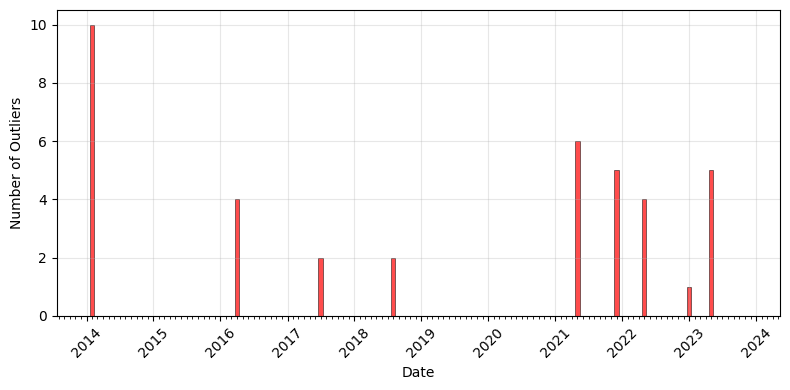

Total outliers: 39
Date range: 2014-02-15 12:34:16.132741008 to 2023-05-06 19:38:40.588889529


In [167]:
# Create histogram of outward outliers by month
import matplotlib.pyplot as plt

# Convert to pandas datetime for easier manipulation
outlier_df = pd.DataFrame({
    'datetime': pd.to_datetime(inward_outliers)
})

# Set date range and bin configuration
start_date = '2014-01'
end_date = '2023-12'
bin_frequency = 'M'  # 'M' for monthly, 'Q' for quarterly, 'Y' for yearly

# Create date range for bins
date_range = pd.date_range(start=start_date, end=end_date, freq=bin_frequency)

# Count outliers per bin
outlier_counts, bin_edges = np.histogram(outlier_df['datetime'], bins=date_range)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot histogram
ax.bar(date_range[:-1], outlier_counts, width=25, alpha=0.7, color='red', 
       edgecolor='black', linewidth=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Outliers')
ax.grid(True, alpha=0.3)

# Format x-axis dates
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total outliers: {len(inward_outliers)}")
print(f"Date range: {outlier_df['datetime'].min()} to {outlier_df['datetime'].max()}")

In [ ]:
# Create mask to filter out predicted crossings based on the criteria for each spacecraft

# Filter B spacecraft data
mask_B = np.ones(len(predicted_crossing_times_norm_B), dtype=bool)
crossing_times_B = predicted_crossing_times_norm_B.astype('datetime64[ns]')

for i in range(len(crossing_times_B) - 1):
    # Check if two crossings are within 90 minutes of each other
    time_diff = (crossing_times_B[i+1] - crossing_times_B[i]) / np.timedelta64(1, 'm')
    
    if time_diff <= 90:
        # Check if Y positions are beyond ±30 Re OR within ±20 Re
        y1, y2 = predicted_positions_B[i, 1], predicted_positions_B[i+1, 1]
        
        if ((y1 < -30 or y1 > 30) and (y2 < -30 or y2 > 30)):
            # Check 3-hour window (2 hours before first, 2 hours after second)
            window_start = crossing_times_B[i] - np.timedelta64(90, 'm')
            window_end = crossing_times_B[i+1] + np.timedelta64(90, 'm')
            
            # Find other crossings in this window (excluding the pair itself)
            window_mask = (crossing_times_B >= window_start) & (crossing_times_B <= window_end)
            window_indices = np.where(window_mask)[0]
            other_crossings = [idx for idx in window_indices if idx != i and idx != i+1]
            
            # If no other crossings in the 4-hour window, mark for removal
            if len(other_crossings) == 0:
                mask_B[i] = False
                mask_B[i+1] = False

# Filter C spacecraft data
mask_C = np.ones(len(predicted_crossing_times_norm_C), dtype=bool)
crossing_times_C = predicted_crossing_times_norm_C.astype('datetime64[ns]')

for i in range(len(crossing_times_C) - 1):

    # Check if two crossings are within 90 minutes of each other
    time_diff = (crossing_times_C[i+1] - crossing_times_C[i]) / np.timedelta64(1, 'm')
    
    if time_diff <= 90:
        # Check if Y positions are beyond ±30 Re OR within ±20 Re
        y1, y2 = predicted_positions_C[i, 1], predicted_positions_C[i+1, 1]
        
        if ((y1 < -30 or y1 > 30) and (y2 < -30 or y2 > 30)):
            # Check 3-hour window (2 hours before first, 2 hours after second)
            window_start = crossing_times_C[i] - np.timedelta64(90, 'm')
            window_end = crossing_times_C[i+1] + np.timedelta64(90, 'm')
            
            # Find other crossings in this window (excluding the pair itself)
            window_mask = (crossing_times_C >= window_start) & (crossing_times_C <= window_end)
            window_indices = np.where(window_mask)[0]
            other_crossings = [idx for idx in window_indices if idx != i and idx != i+1]
            
            # If no other crossings in the 4-hour window, mark for removal
            if len(other_crossings) == 0:
                mask_C[i] = False
                mask_C[i+1] = False



# Apply the masks to filter the data
predicted_crossing_times_norm_B = predicted_crossing_times_norm_B[mask_B]
predicted_positions_B = predicted_positions_B[mask_B]

predicted_crossing_times_norm_C = predicted_crossing_times_norm_C[mask_C]
predicted_positions_C = predicted_positions_C[mask_C]

print(f"Removed crossings for B: {np.sum(~mask_B)}")
print(f"Removed crossings for C: {np.sum(~mask_C)}")

Removed crossings for B: 66
Removed crossings for C: 30


02-Oct-25 21:35:55: c:\Users\ianma\miniconda3\envs\deep_learning\Lib\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(

02-Oct-25 21:35:55: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:108: RuntimeWarning: divide by zero encountered in divide
  R = r0 * (2.0 / (1.0 + np.cos(theta)))**alpha



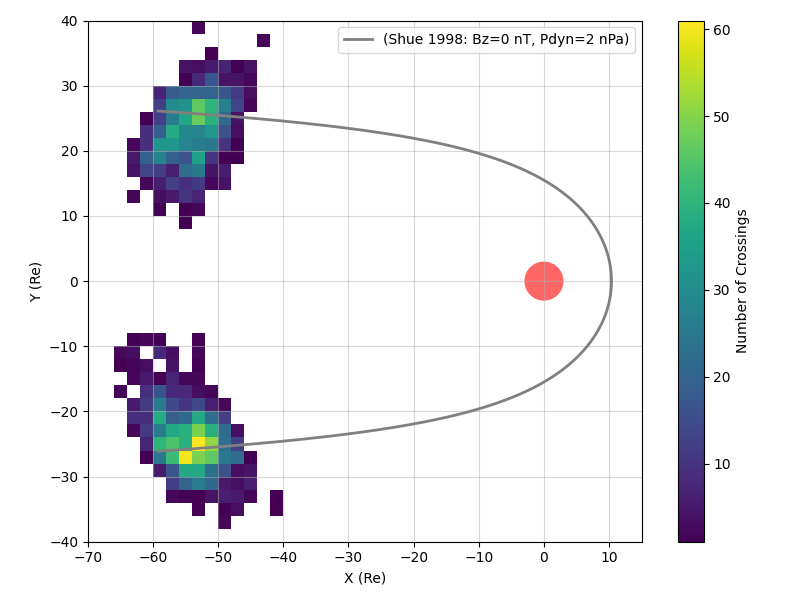

In [158]:
from matplotlib.patches import Circle
import matplotlib.colors as colors
%matplotlib widget


# Combine predicted positions from both spacecraft
predicted_positions_combined = np.vstack([predicted_positions_B, predicted_positions_C])

# --- Figure ---
fig, ax = plt.subplots(figsize=(8,6))

# Axis limits (match your 3D view)
xlim = [-70, 15]
ylim = [-40, 40]

# Create 2x2 Re grid
x_edges = np.arange(xlim[0], xlim[1] + 2, 2)
y_edges = np.arange(ylim[0], ylim[1] + 2, 2)

# Calculate density histogram using combined positions
xp, yp = predicted_positions_combined[:, 0], predicted_positions_combined[:, 1]
density, x_edges, y_edges = np.histogram2d(xp, yp, bins=[x_edges, y_edges])

# Create meshgrid for plotting
X, Y = np.meshgrid(x_edges[:-1] + 1, y_edges[:-1] + 1)  # Center of each bin

# Mask zero values to make them transparent
density_masked = np.ma.masked_where(density.T == 0, density.T)

# Plot density as colored mesh
im = ax.pcolormesh(x_edges, y_edges, density_masked, 
                                   cmap='viridis', alpha=1, shading='auto')
cbar = plt.colorbar(im, ax=ax, label='Number of Crossings')

# Magnetopause curve (upper and lower halves)
mp_x, mp_y = shue_magnetopause_xy(Bz_nT=0.0, Pdyn_nPa=2.0)
mask = (mp_x >= -60) & (mp_x <= xlim[1])  # match your 3D windowing
ax.plot(mp_x[mask],  mp_y[mask],  lw=2, color='gray',
                label='(Shue 1998: Bz=0 nT, Pdyn=2 nPa)')
ax.plot(mp_x[mask], -mp_y[mask], lw=2, color='gray')

# Earth as a filled circle at the origin
earth_radius = 3.0  # set to 1.0 if you want unit Earth
earth = Circle((0.0, 0.0), radius=earth_radius, facecolor='red',
                           alpha=0.6, edgecolor='none')
ax.add_patch(earth)

# Add hover functionality
def format_coord(x, y):
        # Find which bin the coordinates fall into
        x_idx = np.digitize(x, x_edges) - 1
        y_idx = np.digitize(y, y_edges) - 1
        
        # Check bounds
        if 0 <= x_idx < len(x_edges)-1 and 0 <= y_idx < len(y_edges)-1:
                count = density[x_idx, y_idx]
                return f'X={x:.1f}, Y={y:.1f}, Count={count:.0f}'
        else:
                return f'X={x:.1f}, Y={y:.1f}'

ax.format_coord = format_coord

# Cosmetics
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X (Re)')
ax.set_ylabel('Y (Re)')
ax.grid(True, alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()

02-Oct-25 21:36:00: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:90: RuntimeWarning: divide by zero encountered in divide
  R = r0 * (2.0 / (1.0 + np.cos(theta)))**alpha



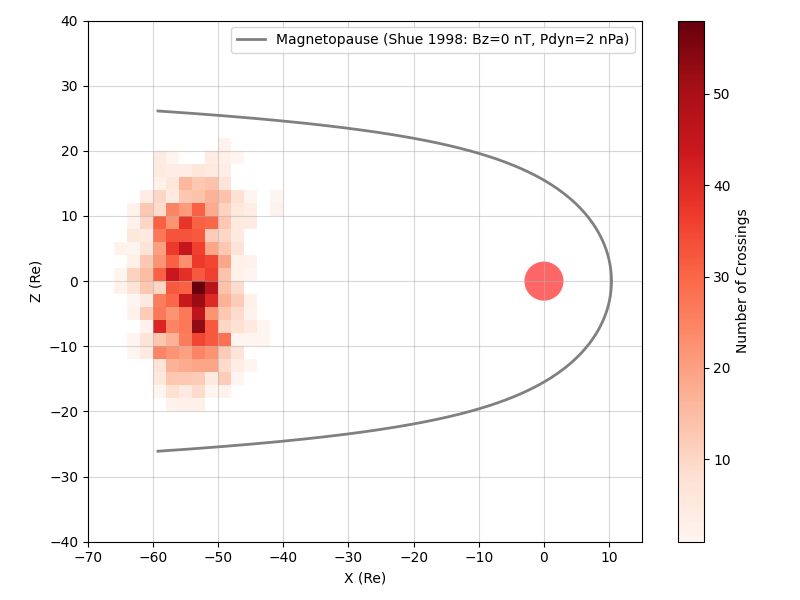

In [159]:
from matplotlib.patches import Circle
import matplotlib.colors as colors
predicted_positions_combined = np.vstack([predicted_positions_B, predicted_positions_C])

# --- Figure ---
fig, ax = plt.subplots(figsize=(8,6))

# Axis limits (match your 3D view)
xlim = [-70, 15]
zlim = [-40, 40]

# Create 2x2 Re grid
x_edges = np.arange(xlim[0], xlim[1] + 2, 2)
z_edges = np.arange(zlim[0], zlim[1] + 2, 2)

# Calculate density histogram
xp, zp = predicted_positions_combined[:, 0], predicted_positions_combined[:, 2]
density, x_edges, z_edges = np.histogram2d(xp, zp, bins=[x_edges, z_edges])

# Create meshgrid for plotting
X, Z = np.meshgrid(x_edges[:-1] + 1, z_edges[:-1] + 1)  # Center of each bin

# Mask zero values to make them transparent
density_masked = np.ma.masked_where(density.T == 0, density.T)

# Plot density as colored mesh
im = ax.pcolormesh(x_edges, z_edges, density_masked, 
                                   cmap='Reds', alpha=1, shading='flat')
cbar = plt.colorbar(im, ax=ax, label='Number of Crossings')

# Add hover functionality
def format_coord(x, z):
        # Find which bin the coordinates fall into
        x_idx = np.digitize(x, x_edges) - 1
        z_idx = np.digitize(z, z_edges) - 1
        
        # Check bounds
        if 0 <= x_idx < len(x_edges)-1 and 0 <= z_idx < len(z_edges)-1:
                count = density[x_idx, z_idx]
                return f'X={x:.1f}, Z={z:.1f}, Count={count:.0f}'
        else:
                return f'X={x:.1f}, Z={z:.1f}'

ax.format_coord = format_coord

# Magnetopause curve (upper and lower halves)
mp_x, mp_z = shue_magnetopause_xz(Bz_nT=0.0, Pdyn_nPa=2.0)
mask = (mp_x >= -60) & (mp_x <= xlim[1])  # match your 3D windowing
ax.plot(mp_x[mask],  mp_z[mask],  lw=2, color='gray',
                label='Magnetopause (Shue 1998: Bz=0 nT, Pdyn=2 nPa)')
ax.plot(mp_x[mask], -mp_z[mask], lw=2, color='gray')

# Earth as a filled circle at the origin
earth_radius = 3.0  # set to 1.0 if you want unit Earth
earth = Circle((0.0, 0.0), radius=earth_radius, facecolor='red',
                           alpha=0.6, edgecolor='none')
ax.add_patch(earth)

# Cosmetics
ax.set_xlim(xlim)
ax.set_ylim(zlim)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X (Re)')
ax.set_ylabel('Z (Re)')
ax.grid(True, alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()

02-Oct-25 21:41:20: C:\Users\ianma\AppData\Local\Temp\ipykernel_18588\2296182213.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df_crossings_filtered.groupby('year').apply(remove_outliers_iqr).reset_index(drop=True)

02-Oct-25 21:41:20: C:\Users\ianma\AppData\Local\Temp\ipykernel_18588\2296182213.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(boxplot_data, labels=sorted(df_no_outliers['year'].unique()), patch_artist=True)



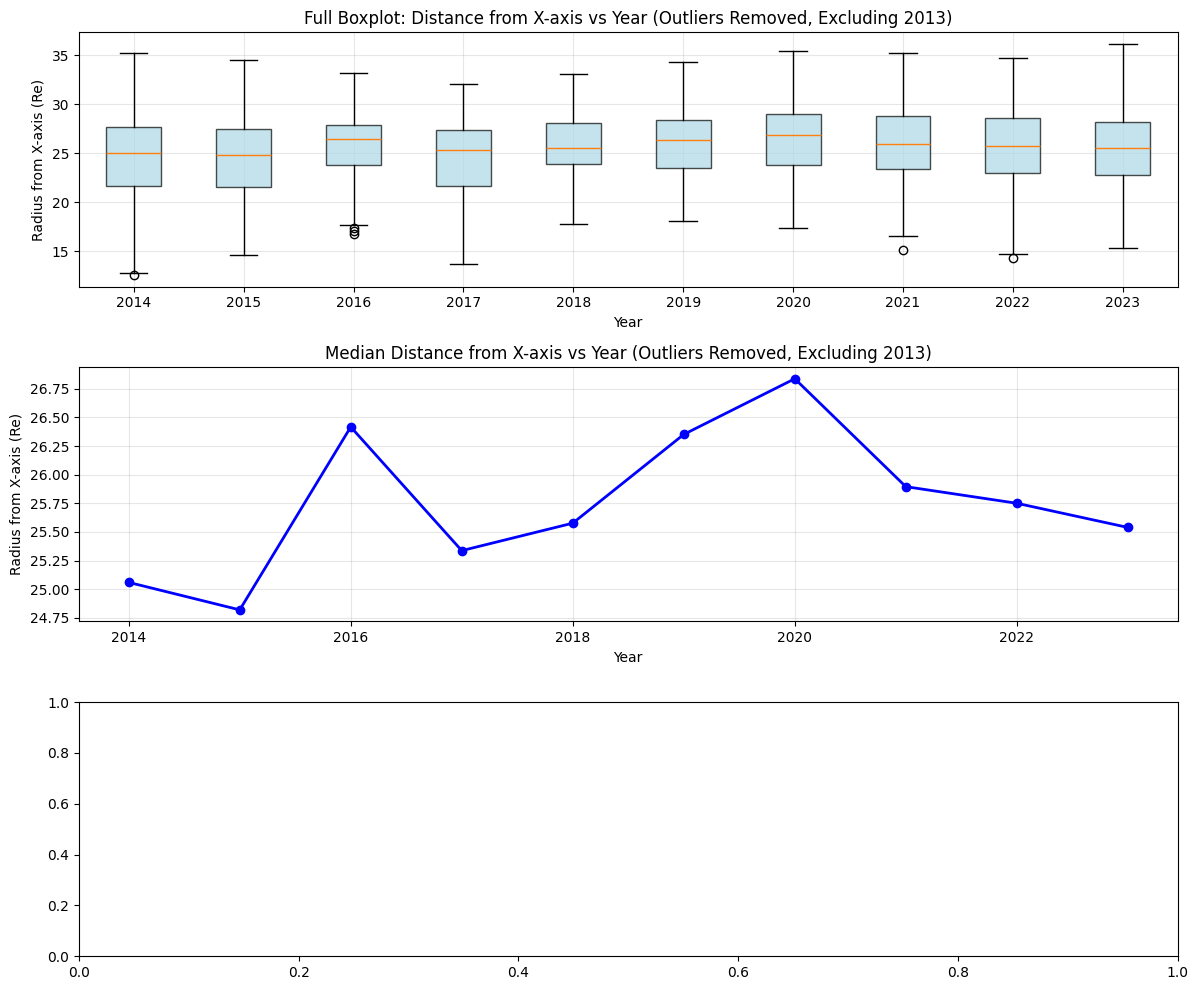

Yearly Statistics with outliers removed (Excluding 2013):
   year  median     q1     q3  count   iqr
0  2014   25.06  21.67  27.71    245  6.03
1  2015   24.82  21.51  27.43    286  5.92
2  2016   26.42  23.76  27.91    201  4.15
3  2017   25.34  21.61  27.33    298  5.72
4  2018   25.58  23.87  28.08    191  4.22
5  2019   26.35  23.53  28.41    242  4.88
6  2020   26.84  23.81  28.97    235  5.16
7  2021   25.90  23.35  28.75    244  5.40
8  2022   25.75  22.95  28.58    253  5.63
9  2023   25.54  22.81  28.23    235  5.43

Outliers removed per year:
2014: 1 outliers removed
2015: 1 outliers removed
2016: 12 outliers removed
2017: 2 outliers removed
2018: 5 outliers removed
2019: 0 outliers removed
2020: 1 outliers removed
2021: 11 outliers removed
2022: 7 outliers removed
2023: 6 outliers removed

Date range: 2014-01-13 01:22:36.041043683 to 2023-11-29 08:35:12.581327232


In [164]:
%matplotlib inline

# Divide the predicted crossings per year without overlap, calculate the median and IQR of the radius from the X axis, and plot across time

# Combine all predicted crossings with timestamps
all_times = np.concatenate([predicted_crossing_times_norm_B, predicted_crossing_times_norm_C])
all_positions = np.vstack([predicted_positions_B, predicted_positions_C])

# Calculate radius from X axis (sqrt(Y^2 + Z^2))
radii = np.sqrt(all_positions[:, 1]**2 + all_positions[:, 2]**2)

# Create DataFrame for easier analysis
df_crossings = pd.DataFrame({
    'time': all_times,
    'x': all_positions[:, 0],
    'y': all_positions[:, 1], 
    'z': all_positions[:, 2],
    'radius_from_x': radii
})

# Convert to pandas datetime for easier manipulation
df_crossings['datetime'] = pd.to_datetime(df_crossings['time'])

# Extract year directly from datetime (no overlap)
df_crossings['year'] = df_crossings['datetime'].dt.year

# Filter out 2013
df_crossings_filtered = df_crossings[df_crossings['year'] > 2013]

# Remove outliers using boxplot standards (IQR method) for each year
def remove_outliers_iqr(group):
    Q1 = group['radius_from_x'].quantile(0.25)
    Q3 = group['radius_from_x'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['radius_from_x'] >= lower_bound) & (group['radius_from_x'] <= upper_bound)]

# Apply outlier removal for each year
df_no_outliers = df_crossings_filtered.groupby('year').apply(remove_outliers_iqr).reset_index(drop=True)

# Group by year and calculate median and IQR for cleaned data
yearly_stats = df_no_outliers.groupby('year')['radius_from_x'].agg([
    'median', 
    lambda x: x.quantile(0.25),  # Q1
    lambda x: x.quantile(0.75),  # Q3
    'count'
]).reset_index()

# Rename columns for clarity
yearly_stats.columns = ['year', 'median', 'q1', 'q3', 'count']
yearly_stats['iqr'] = yearly_stats['q3'] - yearly_stats['q1']

# Create boxplot data for each year
boxplot_data = [df_no_outliers[df_no_outliers['year'] == year]['radius_from_x'].values 
                for year in sorted(df_no_outliers['year'].unique())]

# Create the plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Full boxplot
bp = ax1.boxplot(boxplot_data, labels=sorted(df_no_outliers['year'].unique()), patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Radius from X-axis (Re)')
ax1.set_title('Full Boxplot: Distance from X-axis vs Year (Outliers Removed, Excluding 2013)')
ax1.grid(True, alpha=0.3)

# Plot median radius with error bars (IQR)
ax2.plot(yearly_stats['year'], yearly_stats['median'], 
            marker='o', linewidth=2, color='blue')
ax2.set_xlabel('Year')
ax2.set_ylabel('Radius from X-axis (Re)')
ax2.set_title('Median Distance from X-axis vs Year (Outliers Removed, Excluding 2013)')
ax2.grid(True, alpha=0.3)

# # Plot number of crossings per year (after outlier removal)
# ax3.bar(yearly_stats['year'], yearly_stats['count'], alpha=0.7, color='orange')
# ax3.set_xlabel('Year') 
# ax3.set_ylabel('Number of Crossings')
# ax3.set_title('Number of Predicted Crossings per Year (Outliers Removed, Excluding 2013)')
# ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the statistics table
print("Yearly Statistics with outliers removed (Excluding 2013):")
print(yearly_stats.round(2))

# Print outlier removal summary
original_counts = df_crossings_filtered.groupby('year')['radius_from_x'].count()
cleaned_counts = df_no_outliers.groupby('year')['radius_from_x'].count()
outliers_removed = original_counts - cleaned_counts

print("\nOutliers removed per year:")
for year in sorted(df_crossings_filtered['year'].unique()):
    print(f"{year}: {outliers_removed.get(year, 0)} outliers removed")

# Print date range for verification
print(f"\nDate range: {df_no_outliers['datetime'].min()} to {df_no_outliers['datetime'].max()}")


In [161]:
import math

# 2013   1  0  -0.2  1.60
# 2014   1  0   0.2  1.85
# 2015   1  0  -0.1  2.43
# 2016   1  0  -0.0  2.23
# 2017   1  0  -0.1  2.19
# 2018   1  0  -0.1  1.94
# 2019   1  0  -0.2  1.70
# 2020   1  0  -0.2  1.52
# 2021   1  0  -0.1  1.84
# 2022   1  0  -0.0  1.86
# 2023   1  0  -0.2  1.93

Bz = [0.2, -0.1, 0.0, -0.1, -0.1, -0.2, -0.2, -0.1, 0.0, -0.2]  # nT
Pdyn = [1.85, 2.43, 2.23, 2.19, 1.94, 1.70, 1.52, 1.84, 1.86, 1.93]  # nPa

def r0_shue(Pdyn, Bz):
    # Shue et al. 1998: r0 = (10.22 + 1.29*tanh[0.184*(Bz+8.14)]) * Pdyn**(-1/6.6)
    return (10.22 + 1.29*math.tanh(0.184*(Bz+8.14))) * (Pdyn ** (-1/6.6))

# Calculate r0 for each year
r0_values = [shue_radius_at_x(-54,  Bz[i], Pdyn[i]) for i in range(len(Bz))]



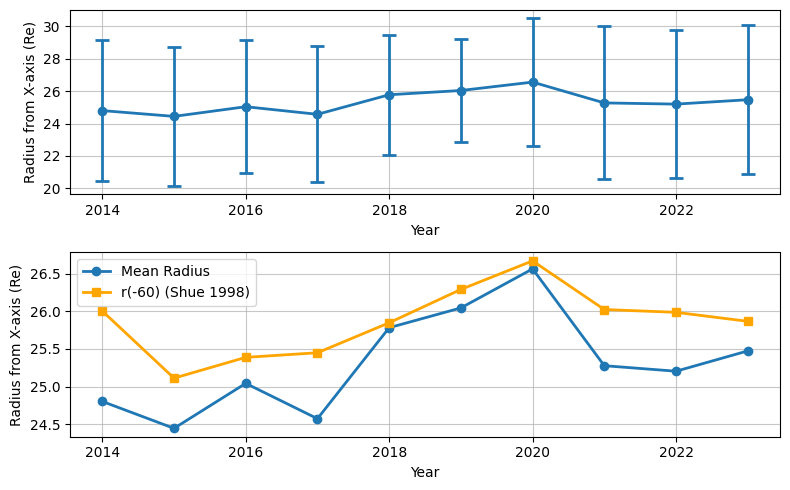

Yearly Statistics (Excluding 2013):
   year   mean   std  count
0  2014  24.80  4.34    246
1  2015  24.44  4.29    287
2  2016  25.04  4.09    213
3  2017  24.57  4.21    300
4  2018  25.78  3.71    196
5  2019  26.04  3.17    242
6  2020  26.56  3.94    236
7  2021  25.28  4.73    255
8  2022  25.20  4.57    260
9  2023  25.47  4.60    241

Date range: 2014-01-13 01:22:36.041043683 to 2023-11-29 08:35:12.581327232


In [165]:
%matplotlib inline

# Divide the predicted crossings per year without overlap, calculate the average and std of the radius from the X axis, and plot across time

# Combine all predicted crossings with timestamps
all_times = np.concatenate([predicted_crossing_times_norm_B, predicted_crossing_times_norm_C])
all_positions = np.vstack([predicted_positions_B, predicted_positions_C])

# Calculate radius from X axis (sqrt(Y^2 + Z^2))
radii = np.sqrt(all_positions[:, 1]**2 + all_positions[:, 2]**2)

# Create DataFrame for easier analysis
df_crossings = pd.DataFrame({
    'time': all_times,
    'x': all_positions[:, 0],
    'y': all_positions[:, 1], 
    'z': all_positions[:, 2],
    'radius_from_x': radii
})

# Convert to pandas datetime for easier manipulation
df_crossings['datetime'] = pd.to_datetime(df_crossings['time'])

# Extract year directly from datetime (no overlap)
df_crossings['year'] = df_crossings['datetime'].dt.year

# Filter out 2013
df_crossings_filtered = df_crossings[df_crossings['year'] > 2013]

# Group by year
yearly_stats = df_crossings_filtered.groupby('year')['radius_from_x'].agg(['mean', 'std', 'count']).reset_index()

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

# Plot mean radius with error bars (std)
ax1.errorbar(yearly_stats['year'], yearly_stats['mean'], yerr=yearly_stats['std'], 
            marker='o', capsize=5, capthick=2, linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('Radius from X-axis (Re)')
ax1.grid(True, alpha=0.7)

# Second axis for r0_values
ax2.plot(yearly_stats['year'], yearly_stats['mean'], marker='o', linewidth=2, label='Mean Radius')
ax2.set_xlabel('Year')
ax2.set_ylabel('Radius from X-axis (Re)')
ax2.grid(True, alpha=0.7)

ax2.plot(yearly_stats['year'], r0_values, marker='s', color='orange', linewidth=2, label='r(-60) (Shue 1998)')
ax2.set_ylabel('Radius from X-axis (Re)', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# Add legends
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Print the statistics table
print("Yearly Statistics (Excluding 2013):")
print(yearly_stats.round(2))

# Print date range for verification
print(f"\nDate range: {df_crossings_filtered['datetime'].min()} to {df_crossings_filtered['datetime'].max()}")


26-Sep-25 16:13:44: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:20: RuntimeWarning: divide by zero encountered in divide
  R = r0 * (2.0 / (1.0 + np.cos(TH)))**alpha

26-Sep-25 16:13:44: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:23: RuntimeWarning: invalid value encountered in multiply
  Z = R * np.sin(TH) * np.sin(PH)



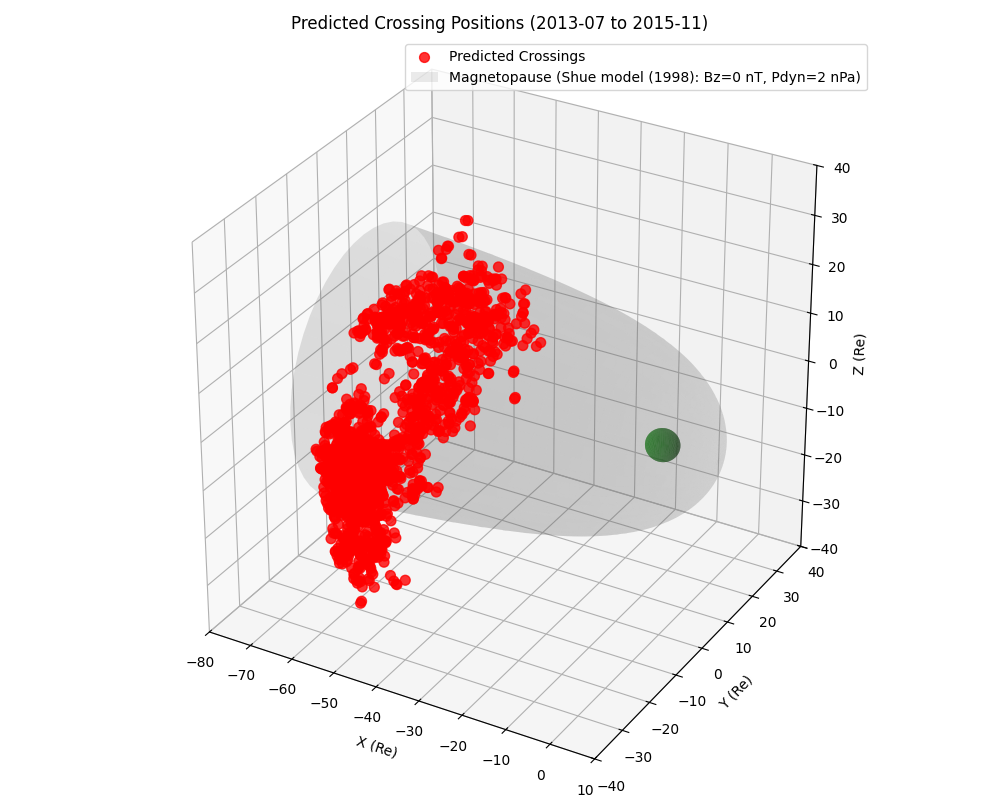

In [ ]:
%matplotlib widget
plt.close()
import matplotlib.lines as mlines
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create Earth sphere with radius of 1 Re
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)

# Plot predicted positions
ax.scatter(predicted_positions[:, 0], predicted_positions[:, 1], predicted_positions[:, 2], 
           c='red', s=50, alpha=0.8, label='Predicted Crossings')

# Plot spacecraft trajectory for each timerange
# for pos_in_range in timeranges_pos:
#     ax.plot(pos_in_range[:, 0], pos_in_range[:, 1], pos_in_range[:, 2], 
#             c='black', alpha=0.1)

# Set labels
ax.set_xlabel('X (Re)')
ax.set_ylabel('Y (Re)')
ax.set_zlabel('Z (Re)')

# Set equal aspect ratio for all axes
box_aspect = [1,1,1]  # Different aspect ratio
ax.set_box_aspect(box_aspect)

# Set axis limits based on data range
xlim = [-80, 15]
ylim = [-40, 40]
zlim = [-40, 40]
ax.set_xlim([-80, 10])
ax.set_ylim([-40, 40])
ax.set_zlim([-40, 40])

# Build the magnetopause surface (using your axis limits)
mp_x, mp_y, mp_z = shue_magnetopause_surface(Bz_nT=0.0, Pdyn_nPa=2.0,
                                             Xmin=-60, Xmax=xlim[1])

# Apply the same visual x-stretch you used for the Earth sphere
x_stretch = (box_aspect[1] / box_aspect[0]) * ((xlim[1] - xlim[0]) / (ylim[1] - ylim[0]))
mp_x_plot = mp_x * x_stretch

# Draw the surface
ax.plot_surface(mp_x_plot, mp_y, mp_z, alpha=0.15, linewidth=0, color='gray', label='Magnetopause (Shue model (1998): Bz=0 nT, Pdyn=2 nPa)')

# Add a legend entry for the surface (plot_surface doesn't auto-legend)
mp_proxy = mlines.Line2D([], [], color='gray', lw=6, alpha=0.6,
                         label='Magnetopause (Shue model: Bz=0 nT, Pdyn=2 nPa)')
handles, labels = ax.get_legend_handles_labels()
handles.append(mp_proxy)
labels.append(mp_proxy.get_label())
ax.legend(handles, labels)

stretch = box_aspect[1]/ box_aspect[0]  # Stretch factor for x-axis

# Earth radius in Re (Earth radii) - 1 Re
earth_radius = 3.0
earth_x = earth_radius * np.outer(np.cos(u), np.sin(v))*stretch*(np.diff(xlim)/np.diff(ylim))
earth_y = earth_radius * np.outer(np.sin(u), np.sin(v))
earth_z = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot Earth as a blue sphere
ax.plot_surface(earth_x, earth_y, earth_z, color='green', alpha=0.6)

ax.legend()
ax.set_title('Predicted Crossing Positions (2013-07 to 2015-11)')
plt.tight_layout()
plt.show()

25-Sep-25 22:49:45: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:90: RuntimeWarning: divide by zero encountered in divide
  R = r0 * (2.0 / (1.0 + np.cos(theta)))**alpha



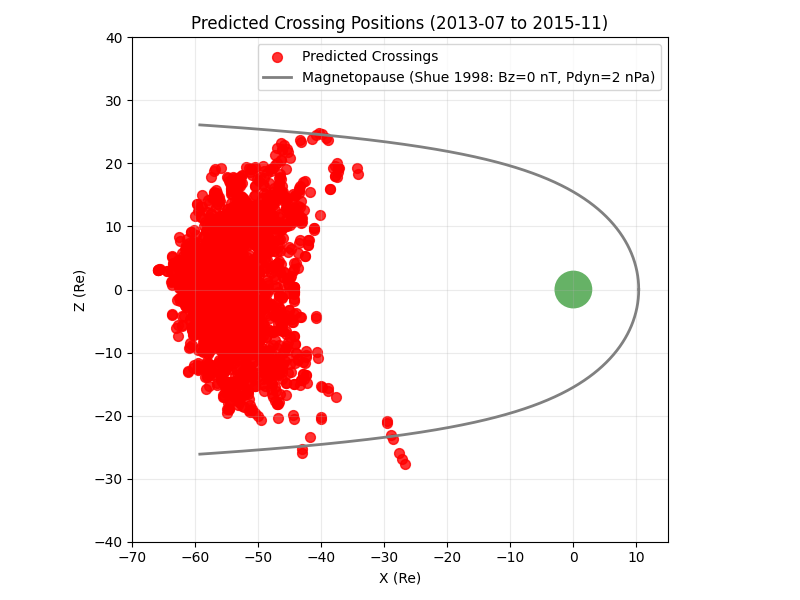

In [ ]:
from matplotlib.patches import Circle

# --- Figure ---
fig, ax = plt.subplots(figsize=(8,6))

# Axis limits (match your 3D view)
xlim = [-70, 15]
zlim = [-40, 40]

# (Optional) If you prefer only points near the X–Z plane, filter by |Y|<=delta.
# delta = 2.0
# pred_mask = np.abs(predicted_positions[:, 1]) <= delta
# true_mask = np.abs(true_positions[:, 1]) <= delta
# xp, zp = predicted_positions[pred_mask, 0], predicted_positions[pred_mask, 2]
# xt, zt = true_positions[true_mask, 0], true_positions[true_mask, 2]
# Otherwise, just project by dropping Y:
xp, zp = predicted_positions[:, 0], predicted_positions[:, 2]

# Points (X vs Z)
ax.scatter(xp, zp, c='red', s=50, alpha=0.8, label='Predicted Crossings')

# Magnetopause curve (upper and lower halves)
mp_x, mp_z = shue_magnetopause_xz(Bz_nT=0.0, Pdyn_nPa=2.0)
mask = (mp_x >= -60) & (mp_x <= xlim[1])  # match your 3D windowing
ax.plot(mp_x[mask],  mp_z[mask],  lw=2, color='gray',
        label='Magnetopause (Shue 1998: Bz=0 nT, Pdyn=2 nPa)')
ax.plot(mp_x[mask], -mp_z[mask], lw=2, color='gray')

# Earth as a filled circle at the origin
earth_radius = 3.0  # set to 1.0 if you want unit Earth
earth = Circle((0.0, 0.0), radius=earth_radius, facecolor='green',
               alpha=0.6, edgecolor='none')
ax.add_patch(earth)

# Cosmetics
ax.set_xlim(xlim)
ax.set_ylim(zlim)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X (Re)')
ax.set_ylabel('Z (Re)')
ax.set_title('Predicted Crossing Positions (2013-07 to 2015-11)')
ax.grid(True, alpha=0.25)
ax.legend()
plt.tight_layout()
plt.show()

25-Sep-25 22:49:47: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:108: RuntimeWarning: divide by zero encountered in divide
  R = r0 * (2.0 / (1.0 + np.cos(theta)))**alpha



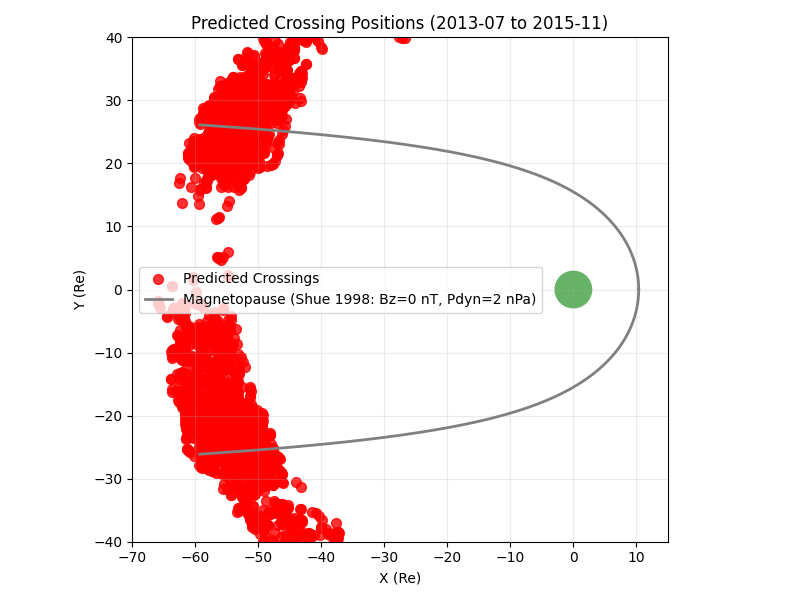

In [ ]:
from matplotlib.patches import Circle

# --- Figure ---
fig, ax = plt.subplots(figsize=(8,6))

# Axis limits (match your 3D view)
xlim = [-70, 15]
ylim = [-40, 40]

# (Optional) If you prefer only points near the X–Z plane, filter by |Y|<=delta.
# delta = 2.0
# pred_mask = np.abs(predicted_positions[:, 1]) <= delta
# true_mask = np.abs(true_positions[:, 1]) <= delta
# xp, zp = predicted_positions[pred_mask, 0], predicted_positions[pred_mask, 2]
# xt, zt = true_positions[true_mask, 0], true_positions[true_mask, 2]
# Otherwise, just project by dropping Y:
xp, yp = predicted_positions[:, 0], predicted_positions[:, 1]

# Points (X vs Z)
ax.scatter(xp, yp, c='red', s=50, alpha=0.8, label='Predicted Crossings')

# Magnetopause curve (upper and lower halves)
mp_x, mp_y = shue_magnetopause_xy(Bz_nT=0.0, Pdyn_nPa=2.0)
mask = (mp_x >= -60) & (mp_x <= xlim[1])  # match your 3D windowing
ax.plot(mp_x[mask],  mp_y[mask],  lw=2, color='gray',
        label='Magnetopause (Shue 1998: Bz=0 nT, Pdyn=2 nPa)')
ax.plot(mp_x[mask], -mp_y[mask], lw=2, color='gray')

# Earth as a filled circle at the origin
earth_radius = 3.0  # set to 1.0 if you want unit Earth
earth = Circle((0.0, 0.0), radius=earth_radius, facecolor='green',
               alpha=0.6, edgecolor='none')
ax.add_patch(earth)

# Cosmetics
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X (Re)')
ax.set_ylabel('Y (Re)')
ax.set_title('Predicted Crossing Positions (2013-07 to 2015-11)')
ax.grid(True, alpha=0.25)
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
predicted_times_numeric[0].astype('datetime64[ns]')

numpy.datetime64('2013-08-17T16:12:58.879218902')

25-Sep-25 23:21:41: c:\Users\ianma\miniconda3\envs\deep_learning\Lib\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(

25-Sep-25 23:21:41: C:\Users\ianma\OneDrive\Thesis\Magnetotail-Boundary-with-ML\Helper\shue_model.py:108: RuntimeWarning: divide by zero encountered in divide
  R = r0 * (2.0 / (1.0 + np.cos(theta)))**alpha



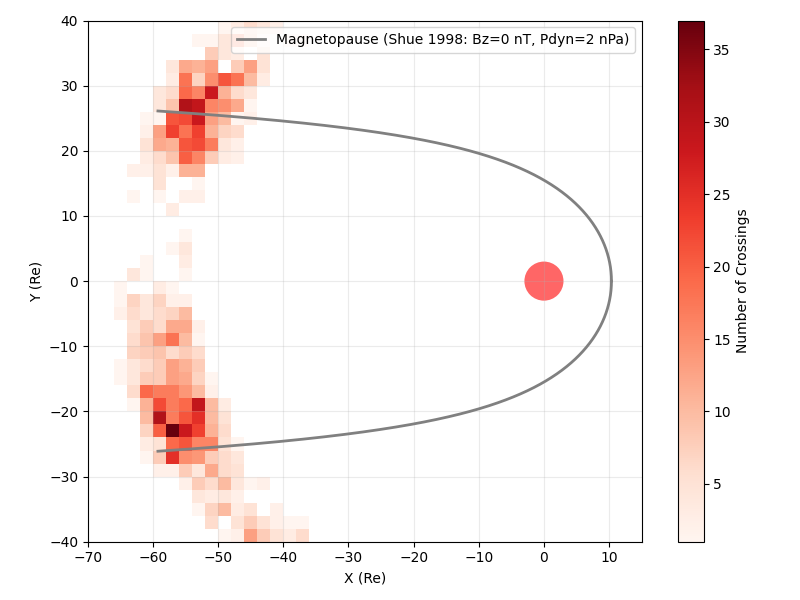

In [ ]:
from matplotlib.patches import Circle
import matplotlib.colors as colors

# --- Figure ---
fig, ax = plt.subplots(figsize=(8,6))

# Axis limits (match your 3D view)
xlim = [-70, 15]
ylim = [-40, 40]

# Create 2x2 Re grid
x_edges = np.arange(xlim[0], xlim[1] + 2, 2)
y_edges = np.arange(ylim[0], ylim[1] + 2, 2)

# Calculate density histogram
xp, yp = predicted_positions[:, 0], predicted_positions[:, 1]
density, x_edges, y_edges = np.histogram2d(xp, yp, bins=[x_edges, y_edges])

# Create meshgrid for plotting
X, Y = np.meshgrid(x_edges[:-1] + 1, y_edges[:-1] + 1)  # Center of each bin

# Mask zero values to make them transparent
density_masked = np.ma.masked_where(density.T == 0, density.T)

# Plot density as colored mesh
im = ax.pcolormesh(x_edges, y_edges, density_masked, 
                   cmap='Reds', alpha=1, shading='auto')
cbar = plt.colorbar(im, ax=ax, label='Number of Crossings')

# Magnetopause curve (upper and lower halves)
mp_x, mp_y = shue_magnetopause_xy(Bz_nT=0.0, Pdyn_nPa=2.0)
mask = (mp_x >= -60) & (mp_x <= xlim[1])  # match your 3D windowing
ax.plot(mp_x[mask],  mp_y[mask],  lw=2, color='gray',
        label='Magnetopause (Shue 1998: Bz=0 nT, Pdyn=2 nPa)')
ax.plot(mp_x[mask], -mp_y[mask], lw=2, color='gray')

# Earth as a filled circle at the origin
earth_radius = 3.0  # set to 1.0 if you want unit Earth
earth = Circle((0.0, 0.0), radius=earth_radius, facecolor='red',
               alpha=0.6, edgecolor='none')
ax.add_patch(earth)

# Cosmetics
ax.set_xlim(xlim)
ax.set_ylim(zlim)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X (Re)')
ax.set_ylabel('Y (Re)')
ax.grid(True, alpha=0.25)
ax.legend()
plt.tight_layout()
plt.show()